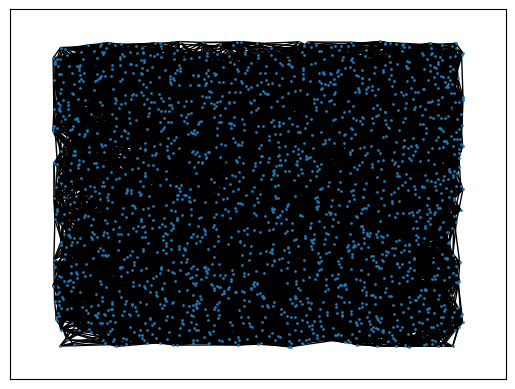

In [39]:
import networkx as nx
import random
import math
import matplotlib.pyplot as plt

def gera_rede_geografica(n, λ):
    lista_vertices = gera_vertices(n)
    lista_arestas = gera_arestas(lista_vertices, λ)
    return lista_vertices, lista_arestas

def gera_vertices(n):
    lista_vertices = []
    for i in range(n):
        x = random.uniform(0, n)
        y = random.uniform(0, n)
        lista_vertices.append((x, y))
    return lista_vertices

def gera_arestas(lista_vertices, λ):
    lista_arestas = []
    n = len(lista_vertices)
    for i in range(n):
        for j in range(i+1, n):
            x1, y1 = lista_vertices[i]
            x2, y2 = lista_vertices[j]
            dist = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
            p = math.exp(-λ * dist)
            if random.random() < p:
                lista_arestas.append((i, j, dist))
    return lista_arestas

# Gerar a rede geográfica
n = 2000
λ = 0.01
lista_vertices, lista_arestas = gera_rede_geografica(n, λ)

# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1)
plt.show()



Caminho percorrido (Busca em Profundidade): [0, 1940, 1971, 1977, 1945, 1998, 1802, 1995, 1906, 1888, 1793, 1935, 1918, 1939, 1755, 1750, 1828, 1914, 1866, 1675, 1556, 1737, 1931, 1907, 743, 1744, 1754, 1976, 1913, 1916, 1946, 1982, 1899, 1993, 1933, 1903, 1988, 1958, 1808, 1924, 1927, 1987, 1861, 1908, 1851, 1795, 1716, 1973, 1991, 1921, 1881, 1969, 1880, 1892, 1877, 1502, 1937, 1891, 1874, 1843, 1859, 1854, 1860, 1635, 1739, 1736, 1580, 1449, 1796, 1994, 1956, 1919, 1822, 1756, 1836, 1849, 1895, 1986, 1985, 1911, 1917, 1975, 1806, 1952, 1984, 1959, 1961, 1896, 1779, 1996, 1850, 1948, 1904, 1947, 1989, 1962, 1932, 1790, 1831, 1844, 1934, 1957, 1951, 1983, 1990, 1954, 1832, 1879, 1938, 1813, 1955, 1912, 1893, 1967, 1981, 1827, 1826, 1943, 1889, 1840, 1641, 1695, 1868, 1978, 1815, 1825, 1884, 1963, 1887, 1878, 1819, 1953, 1909, 1897, 1807, 1789, 1610, 1867, 1814, 1824, 1712, 1767, 1642, 1454, 1774, 1842, 1997, 1748, 1930, 1871, 1799, 1942, 1762, 1833, 1857, 1622, 1602, 1734, 1686, 1898,

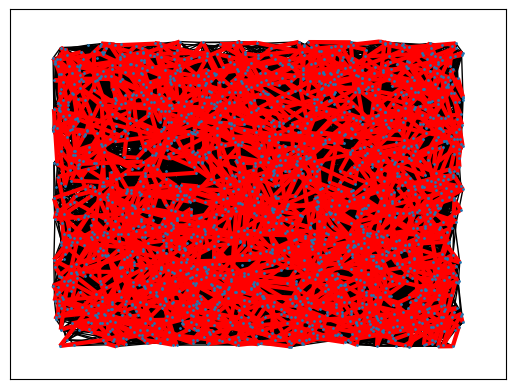

In [40]:
def busca_em_profundidade(grafo, origem, destino):
    visitados = set()
    pilha = [(origem, [origem])]  # (vértice, caminho)

    while pilha:
        atual, caminho = pilha.pop()

        if atual == destino:
            return caminho

        if atual not in visitados:
            visitados.add(atual)

            for vizinho in grafo.neighbors(atual):
                if vizinho not in visitados:
                    pilha.append((vizinho, caminho + [vizinho]))

    return None


# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo completo em branco
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1, edge_color='black')

# Definir a origem e o destino da busca em profundidade
origem = 0
destino = 10

# Executar busca em profundidade
caminho_em_profundidade = busca_em_profundidade(grafo, origem, destino)

if caminho_em_profundidade is not None:
    print("Caminho percorrido (Busca em Profundidade):", caminho_em_profundidade)
else:
    print("Não há caminho entre a origem e o destino (Busca em Profundidade).")

# Destacar o caminho percorrido em verde (Busca em Profundidade)
edges_caminho = [(caminho_em_profundidade[i], caminho_em_profundidade[i+1]) for i in range(len(caminho_em_profundidade)-1)]
nx.draw_networkx_edges(grafo, pos=pos, edgelist=edges_caminho, edge_color='red', width=3)

plt.show()


Caminho percorrido (Busca em Largura): [0, 6, 658, 764, 264, 10]


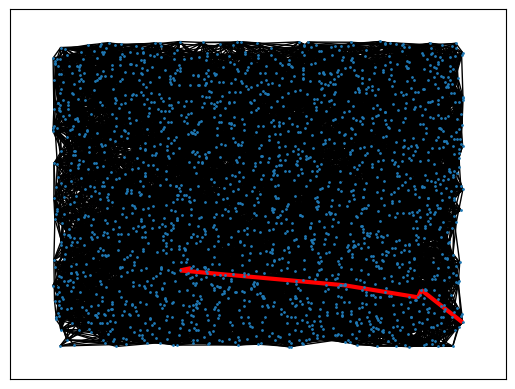

In [41]:
def busca_em_largura(grafo, origem, destino):
    visitados = set()
    fila = [(origem, [origem])]  # (vértice, caminho)

    while fila:
        atual, caminho = fila.pop(0)

        if atual == destino:
            return caminho

        if atual not in visitados:
            visitados.add(atual)

            for vizinho in grafo.neighbors(atual):
                if vizinho not in visitados:
                    fila.append((vizinho, caminho + [vizinho]))

    return None

# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo completo em branco
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1, edge_color='black')

# Definir a origem e o destino da busca em largura
origem = 0
destino = 10

# Executar busca em largura
caminho_em_largura = busca_em_largura(grafo, origem, destino)

if caminho_em_largura is not None:
    print("Caminho percorrido (Busca em Largura):", caminho_em_largura)
else:
    print("Não há caminho entre a origem e o destino (Busca em Largura).")

# Destacar o caminho percorrido em verde (Busca em Largura)
edges_caminho = [(caminho_em_largura[i], caminho_em_largura[i+1]) for i in range(len(caminho_em_largura)-1)]
nx.draw_networkx_edges(grafo, pos=pos, edgelist=edges_caminho, edge_color='red', width=3)

plt.show()


Caminho percorrido (Best-First Search): [0, 6, 658, 764, 264, 10]


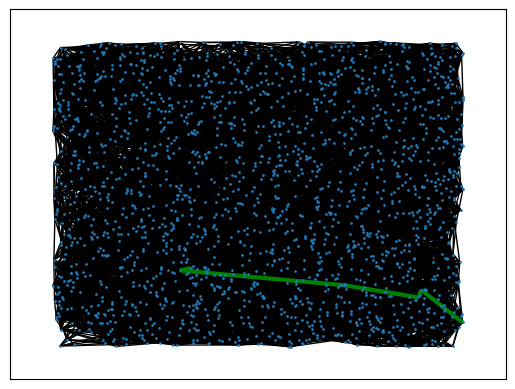

In [42]:
def busca_best_first(grafo, origem, destino):
    visitados = set()
    fila = [(origem, 0)]  # (vértice, valor_heurístico)

    while fila:
        fila.sort(key=lambda x: x[1])  # Ordenar a fila pelo valor heurístico
        atual, _ = fila.pop(0)

        if atual == destino:
            return nx.shortest_path(grafo, origem, destino)

        if atual not in visitados:
            visitados.add(atual)

            for vizinho in grafo.neighbors(atual):
                if vizinho not in visitados:
                    valor_heuristico = calcula_valor_heuristico(grafo, vizinho, destino)
                    fila.append((vizinho, valor_heuristico))

    return None

def calcula_valor_heuristico(grafo, atual, destino):
    x1, y1 = lista_vertices[atual]
    x2, y2 = lista_vertices[destino]
    dist = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    return dist


# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo completo em branco
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1, edge_color='black')

# Definir a origem e o destino da busca Best-First
origem = 0
destino = 10

# Executar busca Best-First
caminho_best_first = busca_best_first(grafo, origem, destino)

if caminho_best_first is not None:
    print("Caminho percorrido (Best-First Search):", caminho_best_first)
else:
    print("Não há caminho entre a origem e o destino (Best-First Search).")

# Destacar o caminho percorrido em verde (Best-First Search)
edges_caminho = [(caminho_best_first[i], caminho_best_first[i+1]) for i in range(len(caminho_best_first)-1)]
nx.draw_networkx_edges(grafo, pos=pos, edgelist=edges_caminho, edge_color='green', width=3)

plt.show()


Caminho percorrido (A* Search): [0, 1715, 672, 1241, 1732, 994, 636, 1079, 487, 547, 1061, 327, 1339, 695, 398, 578, 10]


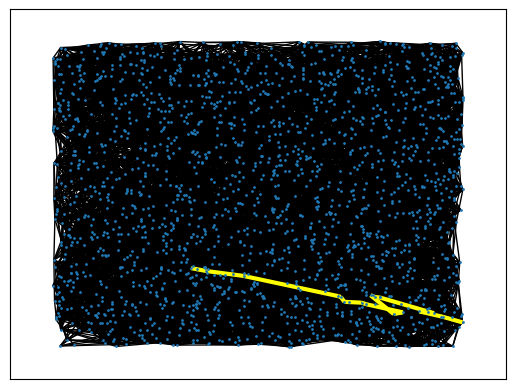

In [43]:
def busca_a_star(grafo, origem, destino):
    visitados = set()
    fila = [(origem, 0, 0)]  # (vértice, custo_acumulado, valor_heurístico)
    caminho_dict = {origem: None}

    while fila:
        fila.sort(key=lambda x: x[1] + x[2])  # Ordenar a fila pelo custo total (custo_acumulado + valor_heurístico)
        atual, custo_acumulado, _ = fila.pop(0)

        if atual == destino:
            return reconstruir_caminho(caminho_dict, destino)

        if atual not in visitados:
            visitados.add(atual)

            for vizinho in grafo.neighbors(atual):
                if vizinho not in visitados:
                    custo = grafo.edges[(atual, vizinho)]['weight']
                    custo_acumulado_vizinho = custo_acumulado + custo
                    valor_heuristico = calcula_valor_heuristico(grafo, vizinho, destino)
                    custo_total = custo_acumulado_vizinho + valor_heuristico
                    fila.append((vizinho, custo_acumulado_vizinho, valor_heuristico))
                    caminho_dict[vizinho] = atual

    return None

def calcula_valor_heuristico(grafo, atual, destino):
    x1, y1 = lista_vertices[atual]
    x2, y2 = lista_vertices[destino]
    dist = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    return dist

def reconstruir_caminho(caminho_dict, destino):
    caminho = [destino]
    while caminho[-1] is not None:
        caminho.append(caminho_dict[caminho[-1]])
    caminho.reverse()
    return caminho

# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1,edge_color='black')

# Definir a origem e o destino da busca A*
origem = 0
destino = 10

# Executar busca A*
caminho_a_star = busca_a_star(grafo, origem, destino)
for item in caminho_a_star:
    if item is None:
        caminho_a_star.remove(item)

if caminho_a_star != "None":
    print("Caminho percorrido (A* Search):", caminho_a_star)
else:
    print("Não há caminho entre a origem e o destino (A* Search).")

# Destacar o caminho percorrido em verde (A* Search)
edges_caminho = [(caminho_a_star[i], caminho_a_star[i+1]) for i in range(len(caminho_a_star)-1)]
nx.draw_networkx_edges(grafo, pos=pos, edgelist=edges_caminho, edge_color='yellow', width=3)

plt.show()


In [44]:
import time

# Definir a função para calcular a distância percorrida em um caminho
def calcular_distancia_percorrida(grafo, caminho):
    distancia_total = 0
    for i in range(len(caminho) - 1):
        u, v = caminho[i], caminho[i + 1]
        distancia_total += grafo[u][v]['weight']
    return distancia_total

# Definir a função para executar os algoritmos de busca e calcular as estatísticas
def executar_algoritmo(algoritmo, grafo, origem, destino):
    start_time = time.time()
    caminho = algoritmo(grafo, origem, destino)
    for item in caminho:
      if item is None:
        caminho.remove(item)
    end_time = time.time()
    tempo_gasto = end_time - start_time

    if caminho is not None:
        distancia_percorrida = calcular_distancia_percorrida(grafo, caminho)
        return caminho, distancia_percorrida, tempo_gasto
    else:
        return None, float('inf'), tempo_gasto

# Definir a função para calcular a média de uma lista de valores
def calcular_media(lista):
    return sum(lista) / len(lista)

# Selecionar 10 pares distintos de vértices (origem, destino)
pares_vertices = [(1, 100), (22, 230), (36, 679), (67, 896), (5, 567), (6, 60), (79, 700), (86, 800), (92, 925), (100, 145)]

# Lista para armazenar as estatísticas de cada algoritmo
estatisticas = []

# Executar os algoritmos de busca para cada par de vértices
for origem, destino in pares_vertices:
    # Executar Busca em Largura
    caminho, distancia, tempo = executar_algoritmo(busca_em_largura, grafo, origem, destino)
    estatisticas.append(('Busca em Largura', origem, destino, distancia, tempo))

    # Executar Busca em Profundidade
    caminho, distancia, tempo = executar_algoritmo(busca_em_profundidade, grafo, origem, destino)
    estatisticas.append(('Busca em Profundidade', origem, destino, distancia, tempo))

    # Executar Best-First Search
    caminho, distancia, tempo = executar_algoritmo(busca_best_first, grafo, origem, destino)
    estatisticas.append(('Best-First Search', origem, destino, distancia, tempo))

    # Executar A*
    caminho, distancia, tempo = executar_algoritmo(busca_a_star, grafo, origem, destino)
    estatisticas.append(('A*', origem, destino, distancia, tempo))


# Calcular as médias de distância percorrida e tempo gasto para cada algoritmo
media_distancia = {}
media_tempo = {}
for algoritmo, origem, destino, distancia, tempo in estatisticas:
    if algoritmo not in media_distancia:
        media_distancia[algoritmo] = []
        media_tempo[algoritmo] = []

    media_distancia[algoritmo].append(distancia)
    media_tempo[algoritmo].append(tempo)

# Imprimir as médias de distância percorrida e tempo gasto para cada algoritmo
for algoritmo in media_distancia:
    media_distancia_algoritmo = calcular_media(media_distancia[algoritmo])
    media_tempo_algoritmo = calcular_media(media_tempo[algoritmo])

    print(f'Algoritmo: {algoritmo}')
    print(f'Distância média percorrida: {media_distancia_algoritmo}')
    print(f'Tempo médio gasto: {media_tempo_algoritmo}')
    print()


Algoritmo: Busca em Largura
Distância média percorrida: 1230.5891774605495
Tempo médio gasto: 0.03462071418762207

Algoritmo: Busca em Profundidade
Distância média percorrida: 272656.8715195345
Tempo médio gasto: 0.35245158672332766

Algoritmo: Best-First Search
Distância média percorrida: 1219.0641304158414
Tempo médio gasto: 0.000730443000793457

Algoritmo: A*
Distância média percorrida: 1215.441059195227
Tempo médio gasto: 0.0029038906097412108

